# Imports 

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
# if xarray doesn't work, may need to upgrade it 

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
cd D:\yello\Documents\Lab_UIUC

D:\yello\Documents\Lab_UIUC


In [3]:
nc1 = xr.open_dataset('Practice_3.26.2020\DJF\clm50_r-clm5.0.30_1deg_GSWP3V1_iso_SSP3-7_AnomalyF.clm2.h1.2015-01.nc')

In [4]:
nc1

<xarray.Dataset>
Dimensions:             (column: 505972, gridcell: 21013, hist_interval: 2, landunit: 62100, lat: 192, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 288, nvegwcs: 4, pft: 800154, time: 1)
Coordinates:
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * time                (time) object 2015-02-01 00:00:00
  * lon                 (lon) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * lat                 (lat) float32 -90.0 -89.057594 ... 89.057594 90.0
Dimensions without coordinates: column, gridcell, hist_interval, landunit, nvegwcs, pft
Data variables:
    mcdate              (time) int32 ...
    mcsec               (time) int32 ...
    mdcur               (time) int32 ...
    mscur               (time) int32 ...
    nstep               (time) int32 ...
    time_bounds         (time, hist_interval) object ...
    date_written        (time) |S16 ...
    time_written        (time) |S16 ...
    area                (lat, lon) float32 ...
    landfrac            (lat, lon) float32 ...
    landmask            (lat, lon) float64 ...
    pftmask             (lat, lon) float64 ...
    nbedrock            (lat, lon) float64 ...
    grid1d_lon          (gridcell) float64 ...
    grid1d_lat          (gridcell) float64 ...
    grid1d_ixy          (gridcell) int32 ...
    grid1d_jxy          (gridcell) int32 ...
    land1d_lon          (landunit) float64 ...
    land1d_lat          (landunit) float64 ...
    land1d_ixy          (landunit) int32 ...
    land1d_jxy          (landunit) int32 ...
    land1d_wtgcell      (landunit) float64 ...
    land1d_ityplunit    (landunit) int32 ...
    land1d_active       (landunit) int32 ...
    cols1d_lon          (column) float64 ...
    cols1d_lat          (column) float64 ...
    cols1d_ixy          (column) int32 ...
    cols1d_jxy          (column) int32 ...
    cols1d_wtgcell      (column) float64 ...
    cols1d_wtlunit      (column) float64 ...
    cols1d_itype_col    (column) int32 ...
    cols1d_itype_lunit  (column) int32 ...
    cols1d_active       (column) int32 ...
    pfts1d_lon          (pft) float64 ...
    pfts1d_lat          (pft) float64 ...
    pfts1d_ixy          (pft) int32 ...
    pfts1d_jxy          (pft) int32 ...
    pfts1d_wtgcell      (pft) float64 ...
    pfts1d_wtlunit      (pft) float64 ...
    pfts1d_wtcol        (pft) float64 ...
    pfts1d_itype_veg    (pft) int32 ...
    pfts1d_itype_col    (pft) int32 ...
    pfts1d_itype_lunit  (pft) int32 ...
    pfts1d_active       (pft) int32 ...
    AGNPP               (time, pft) float32 ...
    AR                  (time, pft) float32 ...
    BTRANMN             (time, pft) float32 ...
    FCEV                (time, pft) float32 ...
    FCTR                (time, pft) float32 ...
    FGEV                (time, pft) float32 ...
    FIRA                (time, pft) float32 ...
    FIRE                (time, pft) float32 ...
    FSA                 (time, pft) float32 ...
    FSH                 (time, pft) float32 ...
    FSR                 (time, pft) float32 ...
    GPP                 (time, pft) float32 ...
    GRAINC_TO_FOOD      (time, pft) float32 ...
    GSSHALN             (time, pft) float32 ...
    GSSUNLN             (time, pft) float32 ...
    HR                  (time, column) float32 ...
    HTOP                (time, pft) float32 ...
    NFERTILIZATION      (time, pft) float32 ...
    NPP                 (time, pft) float32 ...
    NPP_NUPTAKE         (time, pft) float32 ...
    TLAI                (time, pft) float32 ...
    TOTVEGC             (time, pft) float32 ...
    TREFMNAV            (time, pft) float32 ...
    TREFMXAV            (time, pft) float32 ...
    TSA                 (time, pft) float32 ...
    TSKIN               (time, pft) float32 ...
    VEGWP               (time, nvegwcs, pft) flo

# Analysis

In [57]:
# Load previously created files 
tsa_cube = np.load('tsa_cube.npy')
lat_grid = np.load('lat_grid.npy')
lon_grid = np.load('lon_grid.npy')
tsa_wtlunit_cube = np.load('tsa_wtlunit_cube.npy')

In [59]:
# LEI 
tsa_grid_mean = np.nanmean(tsa_cube, axis=2) # this one isn't right but the map makes more sense lol 
tsa_grid_weighted = np.nansum((tsa_cube * tsa_wtlunit_cube), axis=2) # trying to do a weighted mean 

C:\Users\yello\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [15]:
tsa = nc1.TSA
tsa = tsa.where(nc1.pfts1d_itype_lunit==1)
print(tsa.max())
v = tsa.where(nc1.pfts1d_ixy==100).where(nc1.pfts1d_jxy==150).dropna(dim='pft').values

print(v)

<xarray.DataArray 'TSA' ()>
array(309.63922119)
[[248.61655 249.0638  248.97264 248.80084]]


Vegetation/Bare Soil 

In [6]:
# Vegetation/Bare Soil - fill in TSA values 
tsa_cube = np.full((288,192,15), float("NaN")) 

tsa = nc1.TSA.squeeze()
tsa = tsa.where(nc1.pfts1d_itype_lunit==1) # only look at longitude values where the lunit type is 1 aka veg
# ^ this is the first prerequisite 

# v is temporary list of values that have the appropriate land unit and lat/lon desired
for i in range(1,289): # because grabbing from pfts arrays, where the coordinates start from 1, not 0
    for j in range(1,193):
        v = tsa.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        for k in range(len(v)):
            #print(v[k])
            tsa_cube[i-1,j-1,k] = v[k]
            
np.save('tsa_cube', tsa_cube)

In [7]:
# Create latitude grid (for plotting)
lat_grid = np.full((288,192), float("NaN"))

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_lat.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        if v.size == 0: 
            v = [float("NaN")]
        lat_grid[i-1,j-1] = v[0]
        
np.save('lat_grid', lat_grid)

In [8]:
# Create longitude grid (for plotting) 
lon_grid = np.full((288,192), float("NaN"))

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_lon.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        if v.size == 0: 
            v = [float("NaN")]
        lon_grid[i-1,j-1] = v[0]
        
np.save('lon_grid', lon_grid)

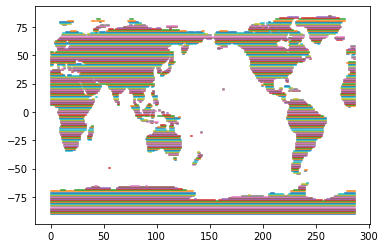

In [9]:
plt.plot(lat_grid)
plt.show()

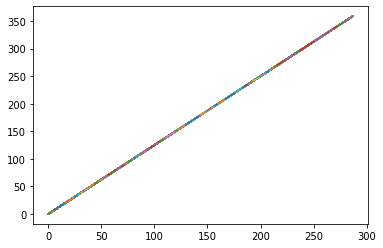

In [10]:
plt.plot(lon_grid)
plt.show()

In [28]:
nc1.pfts1d_wtlunit.isnull().sum()

<xarray.DataArray 'pfts1d_wtlunit' ()>
array(0)

In [31]:
# TSA pft-lunit weight cube 
# LEI can you check this cell please (the nested for loop --> I'm not sure if my masking technique is correct)
tsa_wtlunit_cube = np.full((288,192,15), float("NaN")) 

#tsa = nc1.TSA.squeeze()
tsa = nc1.TSA.where(nc1.pfts1d_itype_lunit==1)

for i in range(1,289): 
    for j in range(1,193):
        v = nc1.pfts1d_wtlunit.where(nc1.pfts1d_itype_lunit==1).where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).where(tsa != np.nan).dropna(dim='pft').values  
        #itype_lunit == 1 is for vegetation/bare soil
        for k in range(len(v)):
            tsa_wtlunit_cube[i-1,j-1,k] = v[k]

np.save('tsa_wtlunit_cube', tsa_wtlunit_cube)

In [82]:
tsa_wtlunit_grid = np.nansum(tsa_wtlunit_cube, axis=2)
tsa_wtlunit_grid.shape

(288, 192)

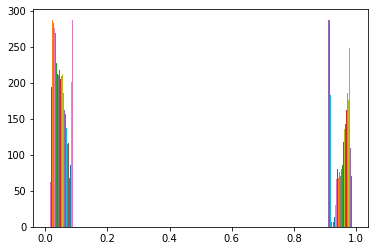

In [85]:
# why don't all the values add up to 1??? 
# LEI 
plt.hist(tsa_wtlunit_grid)
plt.show()

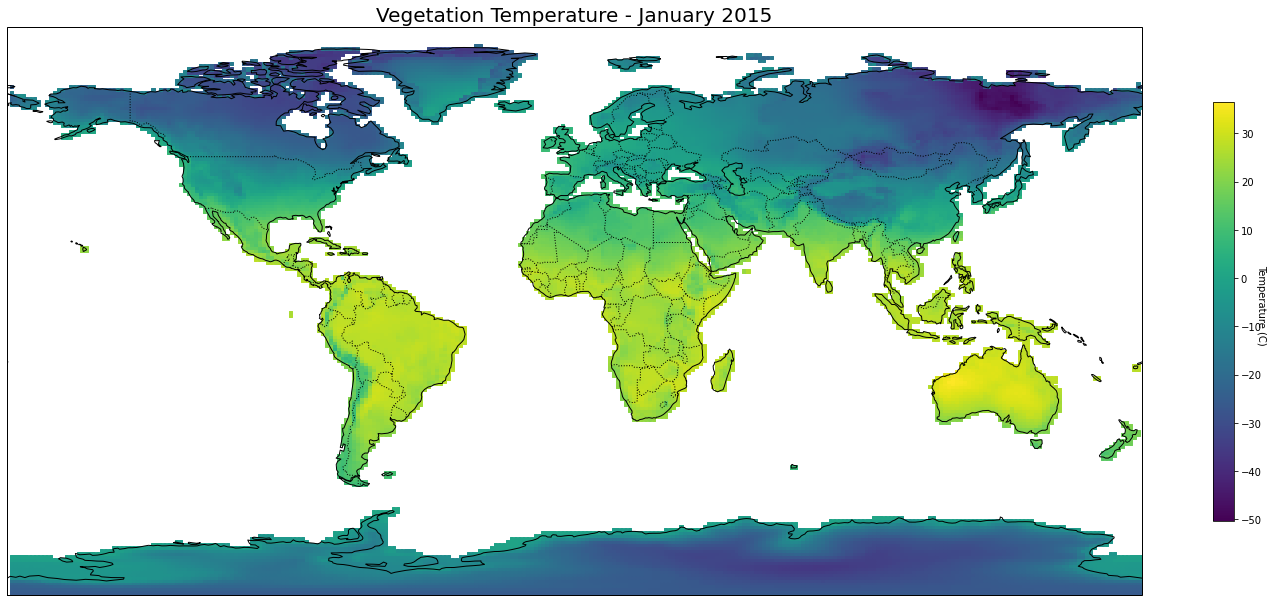

In [86]:
# Took the mean over the pft dimension for the TSA cube 
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(lon_grid, lat_grid, c=(tsa_grid_mean-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Vegetation Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

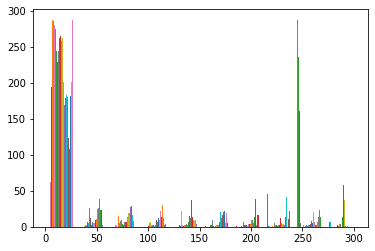

In [78]:
# Histogram of values from weighted TSA grid 
plt.hist(tsa_grid_weighted)
plt.show()

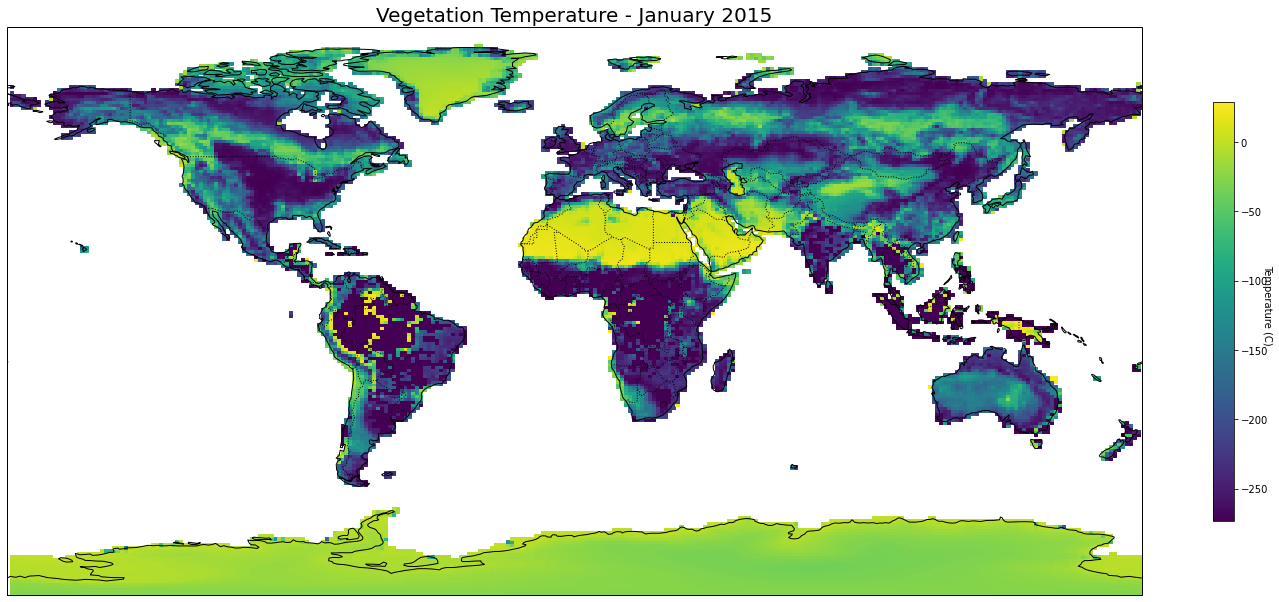

In [87]:
# Multiplied the TSA cube with the TSA weights cube and then summed (weighted mean)
# LEI 
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(lon_grid, lat_grid, c = (tsa_grid_weighted-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Vegetation Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

(288, 192) (288, 192) (288, 192)


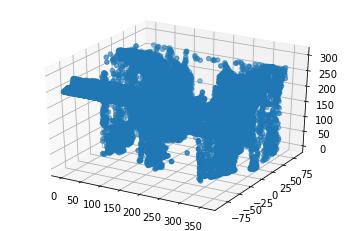

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = tsa_grid_weighted - 273
ax.scatter(lon_grid, lat_grid, tsa_grid_weighted)


# Semi Old Code

In [12]:
# Extracting Rural TSA and corresponding lat/lon
rural_tsa = tsa[pfts1d_itype_lunit == 1]
rural_wt = pfts1d_wtgcell[pfts1d_itype_lunit == 1]
rural_lat = pfts1d_lat[pfts1d_itype_lunit == 1]
rural_lon = pfts1d_lon[pfts1d_itype_lunit == 1]

In [13]:
# Extracting Urban TSA and corresponding lat/lon
urban_tsa = tsa[pfts1d_itype_lunit > 6]
urban_lat = pfts1d_lat[pfts1d_itype_lunit > 6]
urban_lon = pfts1d_lon[pfts1d_itype_lunit > 6]

In [15]:
len(urban_lon)

39500

In [16]:
min(urban_tsa)

<xarray.DataArray 'TSA' ()>
array(235.46974, dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

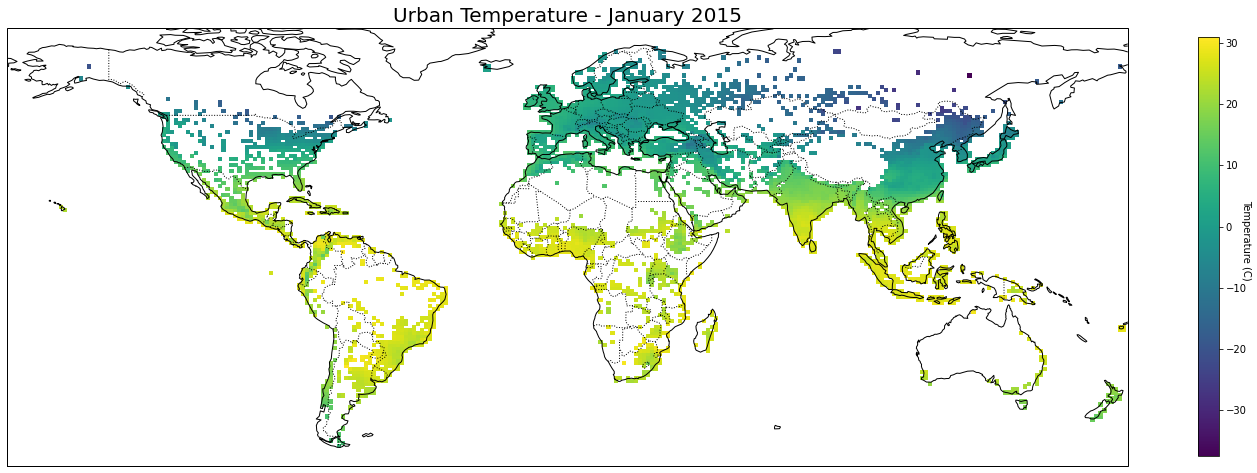

In [28]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(urban_lon, urban_lat, c=(urban_tsa-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Urban Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()
plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\Urban_Jan2015.jpg')


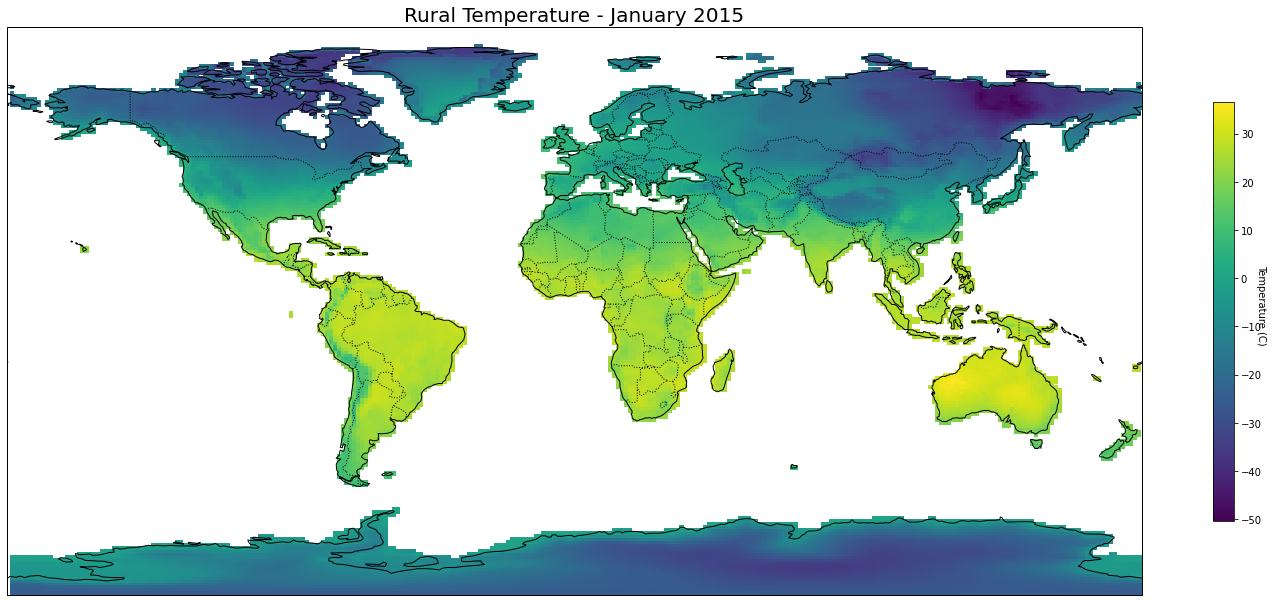

In [30]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(rural_lon, rural_lat, c=(rural_tsa-273), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("Rural Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\Rural_Jan2015.jpg')


ValueError: arguments without labels along dimension 'pft' cannot be aligned because they have different dimension sizes: {315195, 39500}

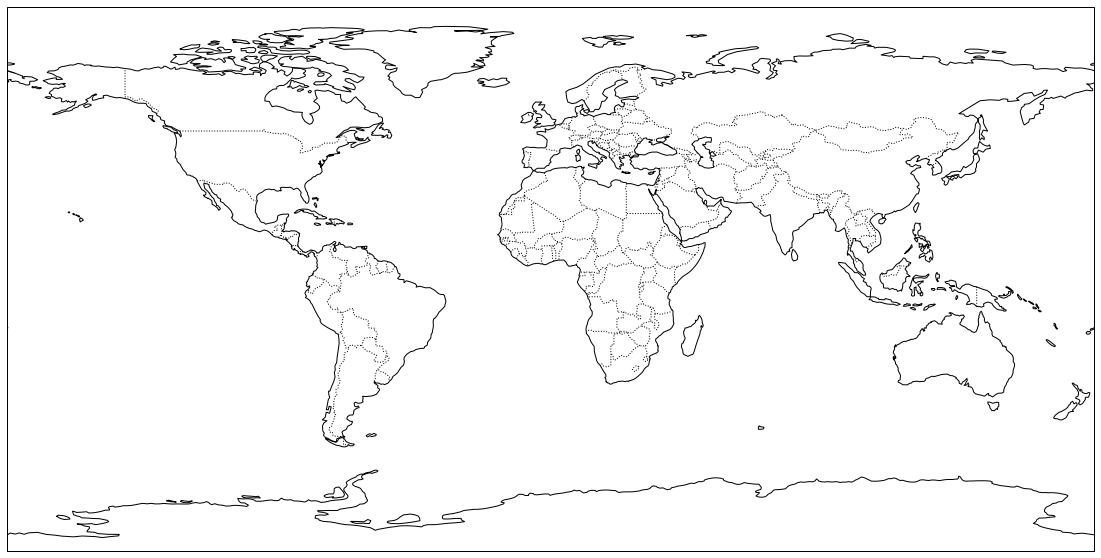

In [31]:
fig, axes = plt.subplots(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.coastlines()

plt.scatter(rural_lon, rural_lat, c=(urban_tsa - rural_tsa), transform=ccrs.PlateCarree(), s=10, marker="s")  

plt.title("UHI Temperature - January 2015", size=20);
cbar = plt.colorbar(shrink=0.6)
cbar.set_label('Temperature (C)    ', rotation=270)

plt.tight_layout()

# plt.savefig(r'D:\yello\Documents\Lab_UIUC\Practice_3.26.2020\UHI_Jan2015.jpg')


In [33]:
urban_tsa

<xarray.DataArray 'TSA' (pft: 39500)>
array([281.0757, 281.0757, 281.0757, ..., 263.9483, 263.9483, 263.9483],
      dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [18]:
wt_rural_tsa = rural_tsa * rural_wt

## Old Code

In [7]:
lat_cube = np.full((288,192,51), float("NaN"))
lon_cube = np.full((288,192,51), float("NaN"))

In [8]:
# Fill in lat cube 
for i in range(1,289): # because grabbing from pfts arrays, where the coordinates start from 1, not 0
    for j in range(1,193):
        v = nc1.pfts1d_lat.where(nc1.pfts1d_ixy==i).where(nc1.pfts1d_jxy==j).dropna(dim='pft').values
        for k in range(len(v)):
            #print(v[k])
            lat_cube[i-1,j-1,k] = v[k]

In [10]:
lat_grid = np.nanmean(lat_cube, axis=2)
lon_grid = np.nanmean(lon_cube, axis=2)
print("Latitude grid shape =", lat_grid.shape)
print("Longitude grid shape =", lon_grid.shape)

Latitude grid shape = (288, 192)
Longitude grid shape = (288, 192)


C:\Users\yello\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
C:\Users\yello\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


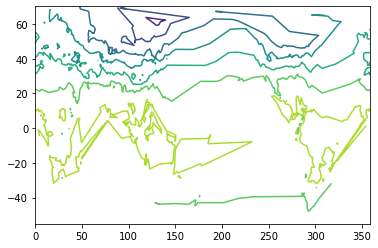

In [14]:
plt.tricontour(urban_lon, urban_lat, urban_tsa)

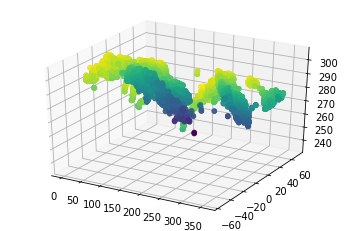

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c = urban_tsa - 273
ax.scatter(urban_lon, urban_lat, urban_tsa, c=c)


TypeError: Input z must be 2D, not 1D

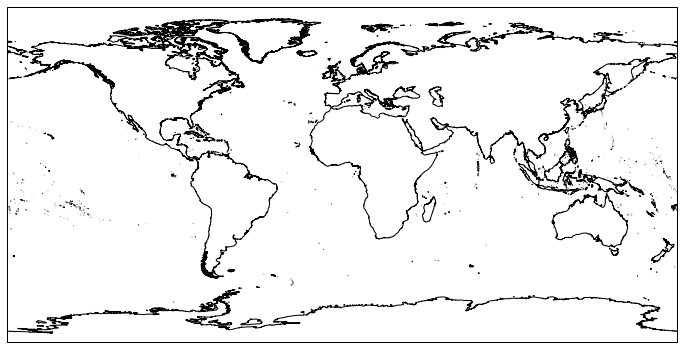

In [78]:
fig, ax = plt.subplots(figsize=(12,10))
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines(resolution='10m')     
plt.contourf(urban_lon, urban_lat, urban_tsa, transform=ccrs.PlateCarree())  

In [53]:
# doesn't work 
a = np.full((39500, 39500), np.nan)
# array is too big 

MemoryError: 

In [50]:
tsa.attrs

{'long_name': '2m air temperature', 'units': 'K', 'cell_methods': 'time: mean'}

wrong - do not run
tsa.to_dataset(dim='pft')

In [84]:
# wrong 
xsize = len(np.unique(rural_lat.data))
ysize = len(np.unique(rural_lon.data))
print(xsize, ',', ysize)

"""Do not run
out = [rural_tsa[i] for i, (x,y) in enumerate(zip(rural_lat, rural_lon))]
out = np.asarray(out).reshape((xsize, ysize))'''

ValueError: cannot reshape array of size 315195 into shape (179,288)

In [39]:
del rural_tsa['time']

In [45]:
# wrong 
xr.merge([rural_tsa, rural_lon, rural_lat])

<xarray.Dataset>
Dimensions:     (pft: 315195)
Dimensions without coordinates: pft
Data variables:
    TSA         (pft) float32 ...
    pfts1d_lon  (pft) float64 ...
    pfts1d_lat  (pft) float64 ...

In [30]:
nc1.landfrac

<xarray.DataArray 'landfrac' (lat: 192, lon: 288)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.25 357.5 358.75
  * lat      (lat) float32 -90.0 -89.057594 -88.11518 ... 89.057594 90.0
Attributes:
    long_name:  land fraction

In [27]:
rural = xr.concat([rural_lat, rural_lon], 'lat')

In [68]:
rural_tsa = rural_tsa.expand_dims('lon')
rural_tsa

<xarray.DataArray 'TSA' (lon: 1, lat: 1, pft: 315195)>
array([[[247.17212,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Dimensions without coordinates: lon, lat, pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [17]:
empty = []
var = 0
for i in range(1,200):
    if (rural_lat[i] == rural_lat[i-1]) and (rural_lon[i] == rural_lon[i-1]):
        var += wt_rural_tsa
    else: 
        empty.append(var)
        var = 0

NameError: name 'wt_rural_tsa' is not defined

In [162]:
empty = []
var = 0
rural_lat = [1,1,1,2,3,4,5,9,9,9,9,9]
rural_lon = [1,1,2,2,3,4,6,1,2,5,4,4]
wt_rural_tsa = [0.1,0.05,0.5,0.22,0.31,.5,.4,.3,.1,.2,.3,.1]
for i in range(1,len(rural_lat)):
    if (rural_lat[i] == rural_lat[i-1]) and (rural_lon[i] == rural_lon[i-1]):
        print(wt_rural_tsa[i-1])
        var += wt_rural_tsa[i-1]
    else: 
        empty.append(var)
        var = 0

0.1
y
0.3
y


In [131]:
tsa[[0, 1, 2, 223925, 223926, 223927, 738172, 800120, 800152, 800153]]

<xarray.DataArray 'TSA' (pft: 10)>
array([247.17212,       nan,       nan, 281.0757 , 281.0757 , 281.0757 ,
       263.9483 ,       nan, 233.28204, 228.7623 ], dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [106]:
rural_tsa = tsa[pfts1d_itype_lunit == 1]
print(rural_tsa)

<xarray.DataArray 'TSA' (pft: 315195)>
array([247.17212,       nan,       nan, ...,       nan,       nan,       nan],
      dtype=float32)
Coordinates:
    time     object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean


In [96]:
(pfts1d_itype_lunit > 6).sum()

<xarray.DataArray 'pfts1d_itype_lunit' ()>
array(39500)

In [113]:
print(np.where(pfts1d_itype_lunit > 6))
pfts1d_itype_lunit > 6

(array([223925, 223926, 223927, ..., 738172, 738173, 738174], dtype=int64),)


<xarray.DataArray 'pfts1d_itype_lunit' (pft: 800154)>
array([False, False, False, ..., False, False, False])
Dimensions without coordinates: pft

In [42]:
#tsa = xr.DataArray(nc1['TSA'].squeeze(), dims="pft", coords = {'pft': [nc1.pfts1d_lat, nc1.pfts1d_lon]})

In [114]:
print(np.where(pfts1d_itype_lunit == 1))
pfts1d_itype_lunit == 1

(array([     0,      1,      2, ..., 800120, 800121, 800122], dtype=int64),)


<xarray.DataArray 'pfts1d_itype_lunit' (pft: 800154)>
array([ True,  True,  True, ..., False, False, False])
Dimensions without coordinates: pft

In [8]:
TSA = xr.DataArray(nc1.TSA, dims=['lon', 'lat', 'pfts1d_itype_lunit'], 
                  coords={'lon': nc1.lon, 'lat': nc1.lat, 
                          'pfts1d_itype_lunit': nc1.pfts1d_itype_lunit})

AttributeError: 'Dataset' object has no attribute 'f'

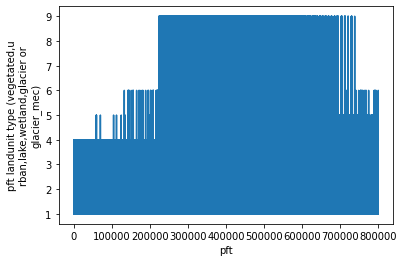

In [34]:
nc1.pfts1d_itype_lunit.plot()

In [12]:
nc1.landunit

<xarray.DataArray 'landunit' (landunit: 62100)>
array([    0,     1,     2, ..., 62097, 62098, 62099], dtype=int64)
Dimensions without coordinates: landunit

In [35]:
nc1.land1d_lon

<xarray.DataArray 'land1d_lon' (landunit: 62100)>
array([  0.,   0.,   0., ..., 330., 330., 330.])
Dimensions without coordinates: landunit
Attributes:
    long_name:  landunit longitude
    units:      degrees_east

In [15]:
nc1.land1d_lat

<xarray.DataArray 'land1d_lat' (landunit: 62100)>
array([-90.     , -90.     , -90.     , ...,  84.34555,  84.34555,  84.34555])
Dimensions without coordinates: landunit
Attributes:
    long_name:  landunit latitude
    units:      degrees_north

In [24]:
nc1.pft

<xarray.DataArray 'pft' (pft: 800154)>
array([     0,      1,      2, ..., 800151, 800152, 800153], dtype=int64)
Dimensions without coordinates: pft

In [23]:
tsa

<xarray.DataArray 'TSA' (time: 1, pft: 800154)>
[800154 values with dtype=float32]
Coordinates:
  * time     (time) object 2015-02-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     2m air temperature
    units:         K
    cell_methods:  time: mean

In [22]:
tsa = nc1.TSA

In [9]:
tsa1 = nc1.TSA
#tsa1.set_coords(lon,lat)

AttributeError: 'DataArray' object has no attribute 'set_coords'

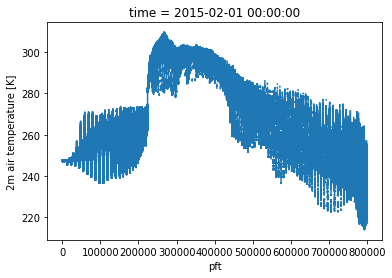

In [11]:
# find some way to add in latitude/longitude data?
""" possible candidates:
grid1d_lat: gridcell latitude
land1d_ityplunit: landunit type(vegetated, urban, lake, wetland, glacier or glacier mec)
^^ am not sure if this is a categorical variable or if they converted it into numbers though?? ex. 0=vegetated, 1=land
land1d_ixy: 2d longitude index of corresponding landunit 
land1d_lat: landunit latitude 
land1d_wtgcell: landunit weight relative to corresponding gridcell 
what is pft??? important or nah 
ltype vs. ctype
"""
tsa1.plot()